### Understanding the Problem Statement

Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

1. Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.
2. Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

### Goal

Our focus will be on the technical analysis part. We’ll be using the dataset of JPX-Tokyo Stock Exchange to build a model capable of estimating the stock close prices

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
import seaborn as sns
import plotly.express as px
import altair as alt
import numpy as np
from math import floor,ceil,sqrt
import sys
import datetime as dt
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

#if not sys.warnoptions:
    #warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from fbprophet import Prophet
from fbprophet.make_holidays import make_holidays_df
from fbprophet.diagnostics import cross_validation
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from ipywidgets import HTML
from io import BytesIO
import base64

import warnings
warnings.simplefilter("ignore")

# Turn off the max column width so the images won't be truncated
pd.set_option('display.max_colwidth', None)
# Show all Columns
pd.set_option('display.max_columns', None)
 
# Turning off the max column will display all the data
# if gathering into sets / array we might want to restrict to a few items
pd.set_option('display.max_seq_items', 3)

In [2]:
df_all = pd.read_csv('../data/train_files/out.csv')

In [3]:
df_all.head(3)

,Date,SecuritiesCode,ExpectedDividend,Open,High,Low,Close,Volume,Target,BOP,Cpos,bsforce,Opos,av,vwap,HLr,OCr,relC,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,others_dr,others_dlr,others_cr,0,1
0,2017-01-04,1301,0.0,2734.0,2755.0,2730.0,2742.0,31400.0,0.000730,-0.320000,-0.020000,-628.000000,-0.340000,2742.333333,2742.0,25.0,-8.0,0.002926,7496628.0,7521150.0,7.916807,0.002922,11.026483,0.941530,0.008495,3,0,0,1,0,0,2742.6,2725.75,2847.54,3088.225,3377.878,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,-1256.000000,31400.0,0.166846,39287.798568,-1.005587e+05,-145816.395088,16349.489506,2724.766606,34.909101,1000.000000,2725.75,2759.548669,2691.951331,2.479954,0.63684,0.0,0.0,2724.3,2767.333333,2717.333333,1.666483,0.493333,0.0,0.0,2681.0,2755.0,2718.0,2.714849,0.72973,0.0,1.127384,0.169958,17.491613,14.043442,2723.833333,2726.692308,2720.375581,2729.511689,0.939103,1.016026,-0.076923,0.331956,26.148689,-39.75,99.490177,99.490177,0.0,2718.5,2718.0,2724.5,2742.5,91.753071,0.0,0.0,0.0,23.76926,2463.600751,2472.555224,16.0,36.0,-20.0,0.0,0.0,49.268322,1.0,1.0,1.0,61.746435,63.328442,62.162162,67.296063,-37.837838,90.302941,-0.802334,0.006227,0.633344,0.503976,-9.943798,6.969853,6.072601,11.463714,-0.145985,0.000000,1.0,0.0
1,2017-01-05,1301,0.0,2743.0,2747.0,2735.0,2738.0,17900.0,0.002920,0.416667,-0.250000,-4475.000000,0.166667,2740.000000,2738.0,12.0,5.0,-0.001823,7510334.0,7513045.0,7.915348,-0.001824,5.315073,0.198134,-2.215052,4,0,0,0,1,0,2742.6,2725.75,2847.54,3088.225,3377.878,2740.666667,2741.619048,2741.843137,2741.960199,2741.984032,-10206.000000,13500.0,0.166846,39287.798568,-1.005587e+05,-145816.395088,3573.494020,2724.766606,34.909101,998.541211,2725.75,2759.548669,2691.951331,2.479954,0.63684,0.0,0.0,2724.3,2759.666667,2722.666667,1.666483,0.414414,0.0,0.0,2681.0,2755.0,2718.0,2.714849,0.72973,0.0,1.127384,0.169958,17.491613,14.043442,2723.833333,2726.692308,2720.375581,2729.511689,0.939103,1.016026,-0.076923,0.331956,26.148689,-39.75,99.490177,99.490177,0.0,2718.5,2718.0,2724.5,2742.5,91.753071,0.0,0.0,0.0,23.76926,2463.600751,2472.555224,16.0,36.0,-20.0,0.0,0.0,49.268322,1.0,1.0,1.0,61.746435,63.328442,62.162162,67.296063,-37.837838,90.302941,-0.802334,0.006227,0.633344,0.503976,-9.943798,6.969853,6.072601,-0.145879,-0.145985,-0.145879,1.0,0.0
2,2017-01-06,1301,0.0,2734.0,2744.0,2720.0,2740.0,19900.0,-0.001092,-0.250000,0.333333,6633.333333,0.083333,2734.666667,2740.0,24.0,-6.0,0.002195,7491160.0,7463680.0,7.916078,0.002192,10.503968,-1.164860,1.085094,5,0,0,0,0,1,2742.6,2725.75,2847.54,3088.225,3377.878,2740.444444,2741.464853,2741.770857,2741.940695,2741.976112,3060.666667,33400.0,0.166846,

### Major Points of Understanding

There are multiple variables in the dataset – Date, Open, High, Low, Close and volume.

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.

High and Low represent the maximum and minimum price of the share for the day.

Volume is the number of shares bought or sold in the day

SecuritiesCode are the different types of stocks 

Another important thing to note is that the market is closed on weekends and public holidays.Notice the above table again, some date values are missing. 

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data

Please Note that the Dataset in this note book has already been pre-processed in the Feature_Engineering.ipynb Notebook.

### Lets Try to Predict one stocks first(3167)

In [4]:
# setting the stocks to 3167
df = df_all.loc[df_all['SecuritiesCode'] == 3167]

Text(0.5, 1.0, 'Stock Price of JPK Stock(3167) over the Years')

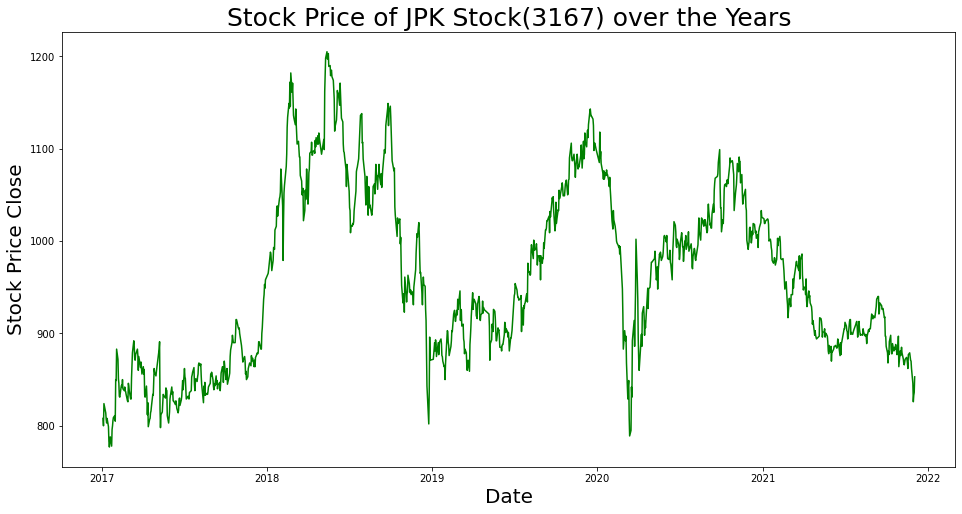

In [5]:
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price Close',size=20)
plt.title('Stock Price of JPK Stock(3167) over the Years',size=25)

Lets explore these variables and use different techniques to predict the daily closing price of the stock.


#### Moving Average (Baseline Model)

Average’ is easily one of the most common things we use in our day-to-day lives.

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/10/stock8.png)

In [6]:
def moving_avg_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('-----------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    preds = []
    for i in range(0,valid_set.shape[0]):
        a = train_set['Close'][len(train_set)-valid_set.shape[0]+i:].sum() + sum(preds)
        b = a/(valid_set.shape[0])
        preds.append(b)
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    rmse = mean_squared_error(valid_set['Close'],preds,squared=False)
    mape =mean_absolute_percentage_error(valid_set['Close'],preds)
    #mape= np.mean(np.abs((df[['Close']] - preds)/df[['Close']]))*100
    print('RMSE value on validation set:',rmse,mape)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Moving Averages',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
    return {"rmse": rmse, "mape": mape}

-----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------
-----------------------------------------------------------
Shape of Training Set (902, 1)
Shape of Validation Set (300, 1)
RMSE value on validation set: 79.46596291953513 0.07484449307592683
-----------------------------------------------------------
-----------------------------------------------------------


{'rmse': 79.46596291953513, 'mape': 0.07484449307592683}

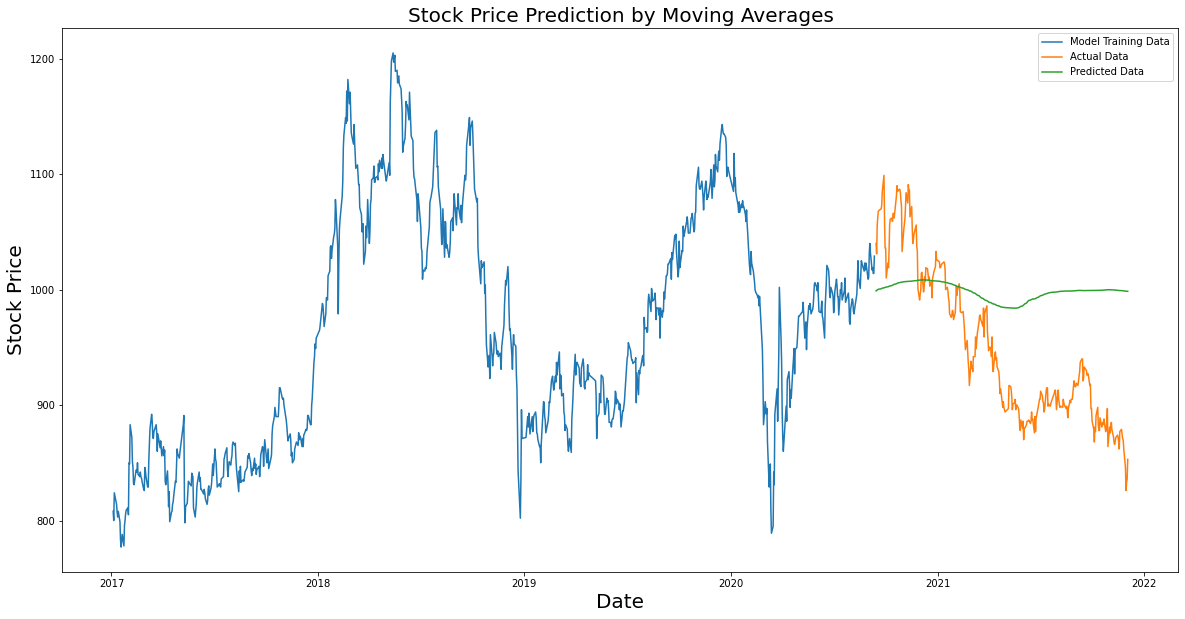

In [7]:
moving_avg_prediction(df)

Observation- The RMSE value is close to 79.49 but the results are not very promising (as we can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

#### Linear Regression

The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

We will first sort the dataset in ascending order and then create a separate dataset so that any new feature created does not affect the original data.

In [8]:
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('JPK Stock Price Prediction by Linear Regression',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set (902, 1)
Shape of Validation Set (300, 1)
RMSE value on validation set: 125.24437941154801
-----------------------------------------------------------
-----------------------------------------------------------


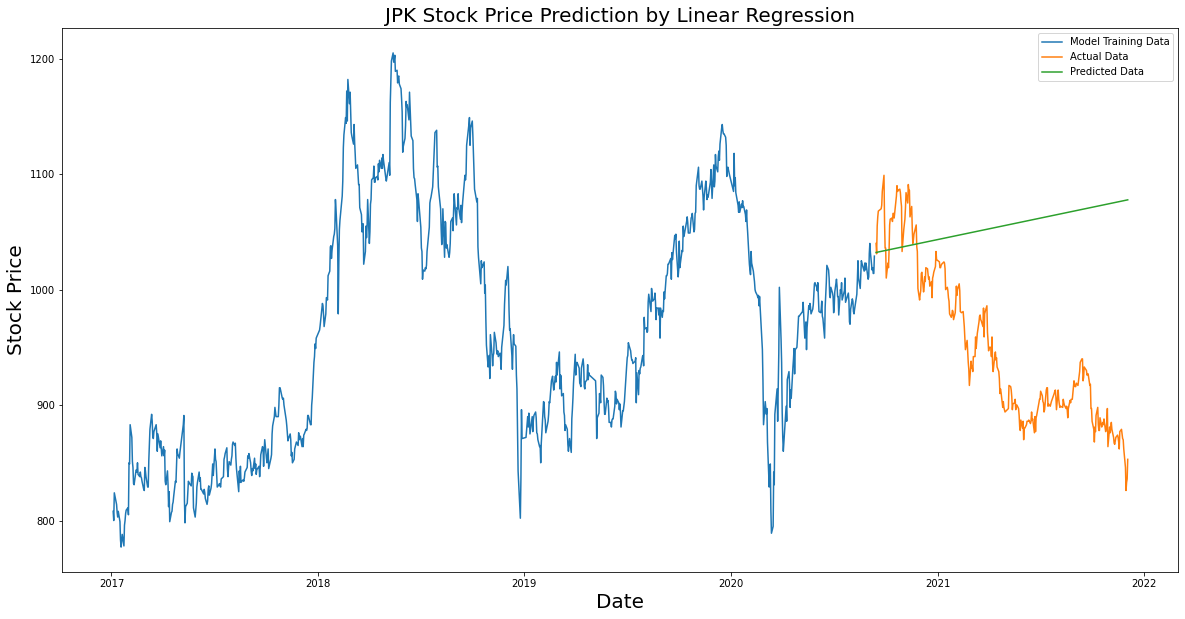

In [9]:
linear_regression_prediction(df)

We can notice that our linear model is performing worst than the Moving average
RMSE is 125.38

#### K-Nearest Neighbours

Another interesting ML algorithm that we used is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points.

In [10]:
def k_nearest_neighbours_predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-------------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-------------------------------------------------------------------
Shape of Training Set (902, 1)
Shape of Validation Set (300, 1)
RMSE value on validation set: 140.4159778347027
-----------------------------------------------------------
-----------------------------------------------------------


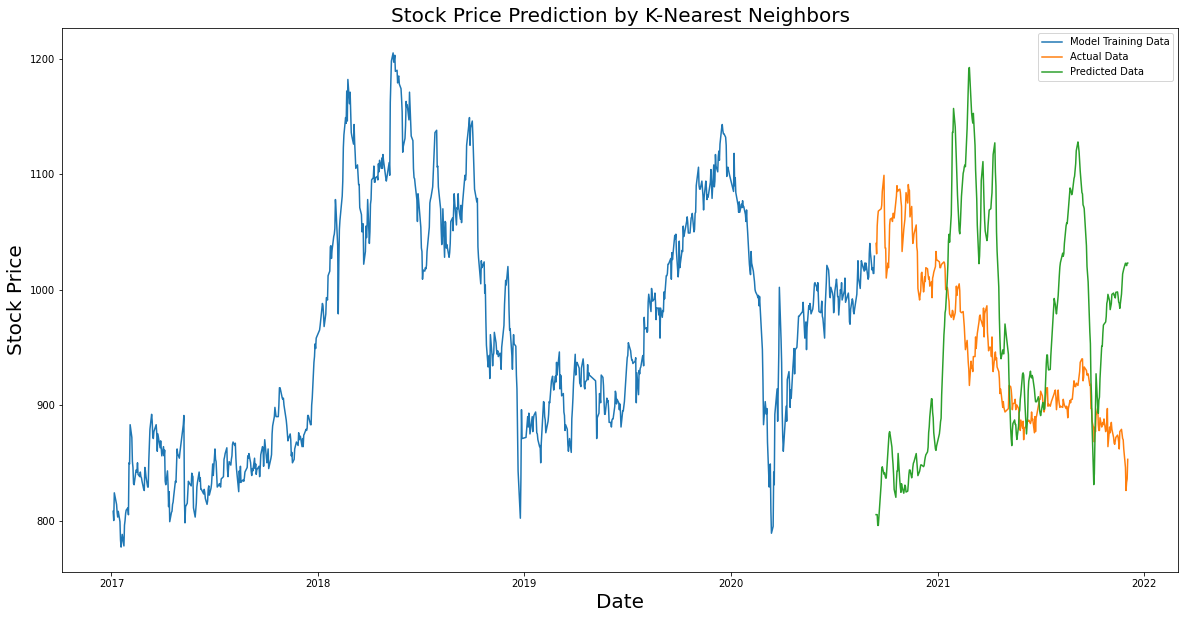

In [11]:
k_nearest_neighbours_predict(df)

The RMSE 140.01 value is almost similar to the linear regression model and the plot shows the same pattern. Like linear regression, kNN also identified a drop in January 2019 and 2020.
We can safely conclude that regression algorithms have not performed well on this dataset.

#### Auto ARIMA

ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

1. p (past values used for forecasting the next value)
2. q (past forecast errors used to predict the future values)
3. d (order of differencing)


In [12]:
import statsmodels.api as sm

In [13]:
def auto_arima_prediction(df):
    shape=df.shape[0]
    df_new=df
    data = df_new.sort_index(ascending=True, axis=0)
    train_set=data[:ceil(shape*0.75)]
    valid_set=data[ceil(shape*0.75):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------')
    print('----------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    training = train_set['Close']
    validation = valid_set['Close']
    model = auto_arima(training,param=3, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=ceil(floor(df.shape[0]*0.25)))
    forecast = pd.DataFrame(forecast,index = valid_set.index,columns=['Prediction'])
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-np.array(forecast['Prediction'])),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    plt.plot(train_set['Close'])
    plt.plot(valid_set['Close'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Auto ARIMA',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------
----------------------------------------------------------
Shape of Training Set (902, 126)
Shape of Validation Set (300, 126)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7875.361, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7636.071, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7875.123, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7556.584, Time=0.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.90 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7555.437, Time=0.20 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=7635.276, Time=0.09 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.42 sec


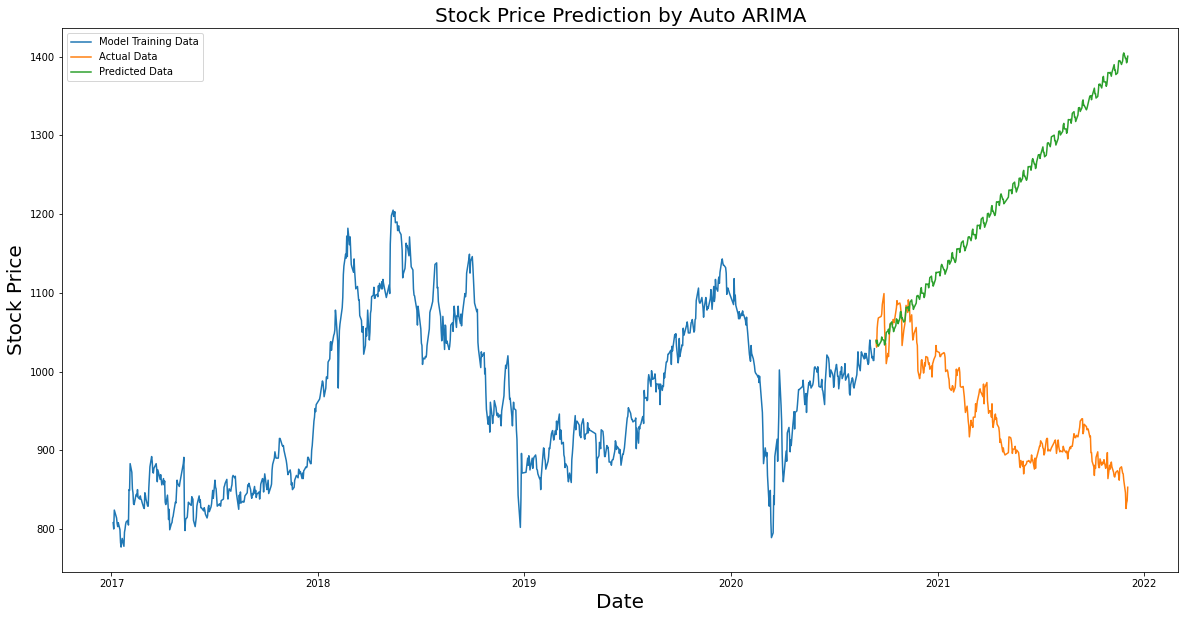

In [14]:
auto_arima_prediction(df)

The auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series. As its evident from the plot, the model has captured a trend in the series, but does not focus on the seasonal part.

#### Sarimax

In [15]:
def auto_sarimax_prediction(df):
    shape=df.shape[0]
    df_new=df
    data = df_new.sort_index(ascending=True, axis=0)
    train_set=data[:ceil(shape*0.75)]
    valid_set=data[ceil(shape*0.75):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO SARIMAX-----------')
    print('----------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    training = train_set['Close']
    validation = valid_set['Close']
    model = auto_arima(training, start_P=1,
                       start_q=1,
                       max_p=3,
                       max_q=3,
                       m=12,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True,
                       order=(3, 0, 0),
                       seasonal_order=(2, 1, 0, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
    model.fit(training)
    forecast = model.predict(n_periods=ceil(floor(df.shape[0]*0.25)))
    forecast = pd.DataFrame(forecast,index = valid_set.index,columns=['Prediction'])
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-np.array(forecast['Prediction'])),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    plt.plot(train_set['Close'])
    plt.plot(valid_set['Close'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Auto SARIMAX',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO SARIMAX-----------
----------------------------------------------------------
Shape of Training Set (902, 126)
Shape of Validation Set (300, 126)
Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.86 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9441.439, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=7622.887, Time=0.64 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=8668.370, Time=0.83 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9442.815, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7850.072, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=7548.799, Time=6.39 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.20 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=9437.372, Time=5.11 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=7550.718, Ti

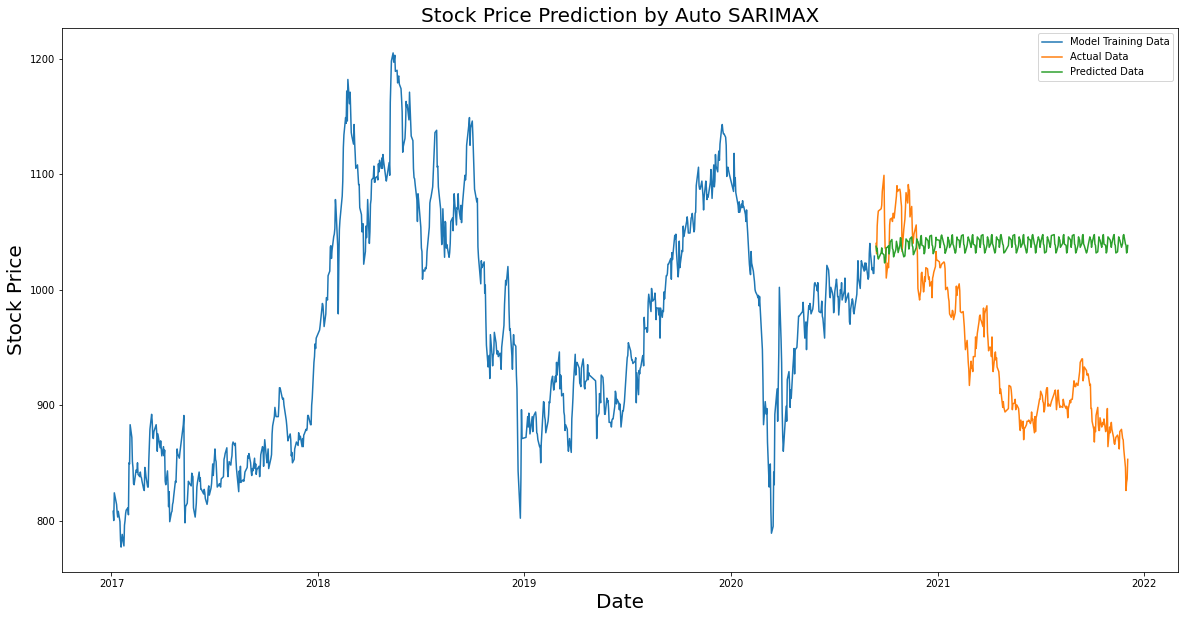

In [16]:
auto_sarimax_prediction(df)

Our Sarimax Model performing better than the Arima model with RMSE of 112 Although this isnt good enough

#### Prophet

Prophet, designed and pioneered by Facebook, is a time series forecasting library that requires no data preprocessing and is extremely simple to implement. The input for Prophet is a dataframe with two columns: date and target (ds and y).

Prophet tries to capture the seasonality in the past data and works well when the dataset is large.

In [45]:
def fb_prophet_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.reset_index(inplace=True)
    df_new['Date'] = pd.to_datetime(df_new.Date,format='%Y-%m-%d')
    df_new.index = df_new['Date']
    df_new.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY FB PROPHET-----------')
    print('-------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape) 
    
    #year_list = [2017, 2018, 2019, 2020, 2021, 2022]
    #holidays = make_holidays_df(year_list=year_list, country='JP')
    #w=3
    
    model = Prophet(
                    #growth='linear',
                    #changepoint_range= 0.8,
                    #interval_width=0.8,
                    #holidays=holidays,
                    yearly_seasonality=True,
                    weekly_seasonality=True,
                    daily_seasonality=True)
                    #changepoint_prior_scale=0.015)
    #model.add_seasonality(name = 'yearly',period=245,fourier_order=12).add_seasonality(name='monthly', period=24, fourier_order=4).add_seasonality(name='weekly', period=5, fourier_order=5)

    model.fit(train_set)
    close_prices = model.make_future_dataframe(periods=len(valid_set))
    forecast = model.predict(close_prices)
    forecast_valid = forecast['yhat'][ceil(shape*0.75):]
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['y'])-np.array(forecast_valid)),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = forecast_valid.values
    plt.plot(train_set['y'])
    plt.plot(valid_set[['y', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by FB Prophet',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-------------------------------------------------------
-----------STOCK PRICE PREDICTION BY FB PROPHET-----------
-------------------------------------------------------
Shape of Training Set (902, 2)
Shape of Validation Set (300, 2)
Initial log joint probability = -5.51868
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2372.08     0.0042709       500.876           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2418.81    0.00441801       572.283           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2430.94     0.0479792       754.082           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2448.32    0.00324265        308.16      0.9567      0.9567      465   
    Iter

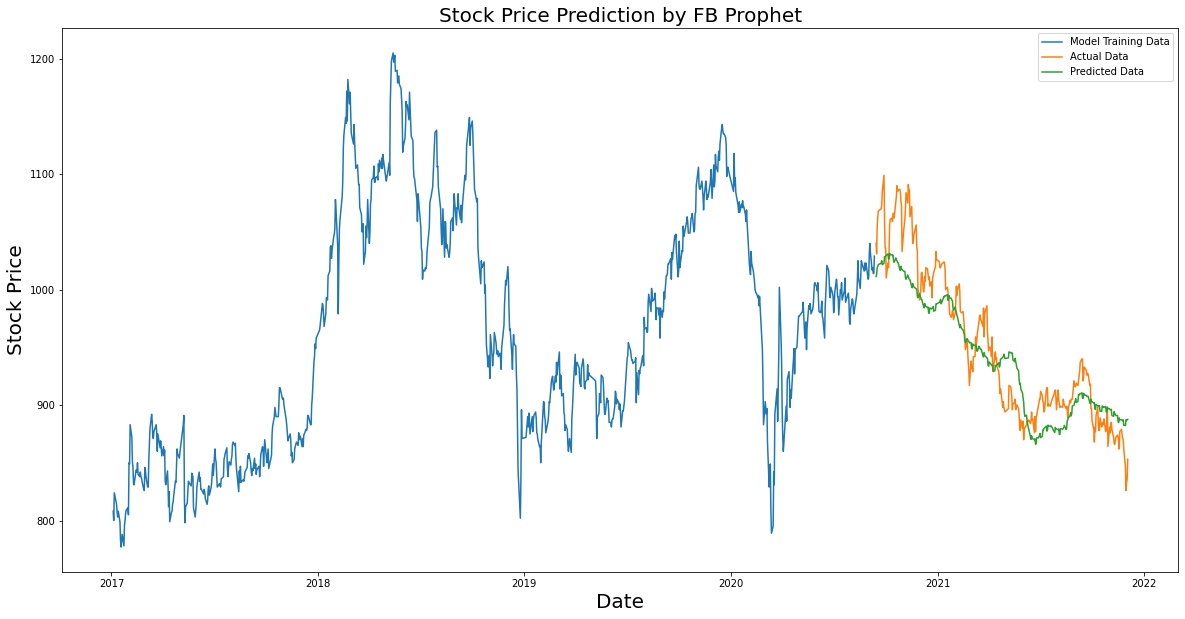

In [46]:
fb_prophet_prediction(df)

Prophet (like most time series forecasting techniques) tries to capture the trend and seasonality from past data. This model usually performs well on time series datasets, but fails to live up to it’s reputation in this case.
Athough Our model has improved significantly, stock prices do not have a particular trend or seasonality. It highly depends on what is currently going on in the market and thus the prices rise and fall.

#### Long Short Term Memory (LSTM)

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

![](https://i.stack.imgur.com/aTDpS.png)

The input gate: The input gate adds information to the cell state
The forget gate: It removes the information that is no longer required by the model
The output gate: Output Gate at LSTM selects the information to be shown as output


In [50]:
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train,epochs=50, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM) for 3167',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (902, 1)
Shape of Validation Set (300, 1)
Epoch 1/50


2022-06-02 13:01:58.395021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-02 13:01:58.634542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-02 13:01:58.729827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-02 13:01:58.814194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-02 13:01:58.934270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


862/862 - 19s - loss: 0.0071 - 19s/epoch - 22ms/step
Epoch 2/50
862/862 - 17s - loss: 0.0033 - 17s/epoch - 20ms/step
Epoch 3/50
862/862 - 17s - loss: 0.0023 - 17s/epoch - 19ms/step
Epoch 4/50
862/862 - 17s - loss: 0.0018 - 17s/epoch - 20ms/step
Epoch 5/50
862/862 - 17s - loss: 0.0017 - 17s/epoch - 20ms/step
Epoch 6/50
862/862 - 17s - loss: 0.0016 - 17s/epoch - 19ms/step
Epoch 7/50
862/862 - 17s - loss: 0.0016 - 17s/epoch - 19ms/step
Epoch 8/50
862/862 - 17s - loss: 0.0015 - 17s/epoch - 19ms/step
Epoch 9/50
862/862 - 17s - loss: 0.0015 - 17s/epoch - 20ms/step
Epoch 10/50
862/862 - 17s - loss: 0.0016 - 17s/epoch - 20ms/step
Epoch 11/50
862/862 - 17s - loss: 0.0015 - 17s/epoch - 20ms/step
Epoch 12/50
862/862 - 17s - loss: 0.0014 - 17s/epoch - 20ms/step
Epoch 13/50
862/862 - 17s - loss: 0.0014 - 17s/epoch - 20ms/step
Epoch 14/50
862/862 - 18s - loss: 0.0015 - 18s/epoch - 21ms/step
Epoch 15/50
862/862 - 18s - loss: 0.0014 - 18s/epoch - 20ms/step
Epoch 16/50
862/862 - 18s - loss: 0.0013 - 18

2022-06-02 13:16:18.381610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-02 13:16:18.586218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-02 13:16:20.525051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


RMSE value on validation set: Close    10.457553
dtype: float64
-----------------------------------------------------------
-----------------------------------------------------------


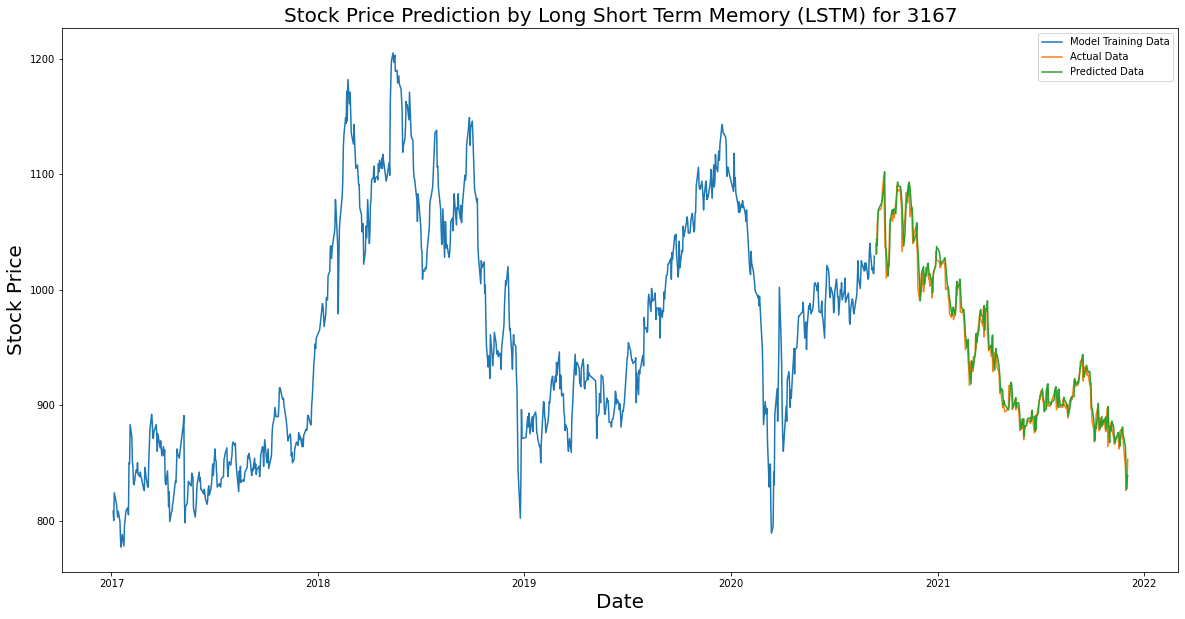

In [51]:
lstm_prediction(df)

Best Model so far,With an RMSE of 10.4


We will Try to Improve LSTM and FBProphet in Subsequent Notebook. We shall also test our model on the other stocks in the Jpx Tokyo Stock market.


# Play

In [154]:
df.head(2)

,Date,SecuritiesCode,ExpectedDividend,Open,High,Low,Close,Volume,Target,BOP,Cpos,bsforce,Opos,av,vwap,HLr,OCr,relC,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,others_dr,others_dlr,others_cr,0,1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-04,2017-01-04,3167,15.0,820.0,820.0,804.0,808.0,707200.0,0.030000,0.750000,-0.250000,-176800.000000,0.5,810.666667,808.0,16.0,12.0,-0.014634,662560.0,659280.0,6.695799,-0.014742,8.246211,-0.199735,-4.858131,3,0,0,1,0,0,1158.4,1250.80,1264.92,1296.99,1388.902,1104.74636,1226.218450,1256.587529,1300.713326,1331.413308,-5.494450e+09,6.494465e+10,-0.499718,-4.427484e+07,-992081.447964,-1.371912e+06,-248571.400504,849.074703,4.178602,2.525350e-39,1250.80,1457.110058,1044.489942,32.988497,-0.573142,0.0,1.0,1228.333333,1245.033333,1211.633333,2.719132,-12.084830,0.0,1.0,804.0,1301.0,1052.5,39.734570,0.008048,60.321276,10.302614,-42.163080,-9.097155,-33.065925,1234.0,1257.576923,1195.268596,1237.431675,0.894819,1.070644,-0.175824,-0.082774,26.149853,29.20,-29.912988,3.183532,-33.096520,1051.0,1078.5,1064.75,1078.5,2.996081,27.540532,6.685790,74.599626,-648.397483,1277.25,1290.0,48.0,100.0,-52.0,0.0,0.0,7.881308,0.0,0.040113,0.026742,-42.245802,5.328737,0.809717,3.193882,-99.190283,-93.405882,-36.973479,-3.407306,-0.734169,-2.673137,96.948542,17.917888,79.030654,-35.152488,-43.313164,-70.532458,1.0,0.0
2017-01-05,2017-01-05,3167,15.0,809.0,809.0,795.0,800.0,471700.0,-0.012136,0.642857,-0.142857,-67385.714286,0.5,801.333333,800.0,14.0,9.0,-0.011125,647200.0,643155.0,6.685861,-0.011187,6.946222,-0.428906,-3.577116,4,0,0,0,1,0,1067.2,1227.35,1254.48,1294.12,1387.774,1003.16424,1185.626217,1238.682136,1295.731104,1329.291897,-5.494585e+09,6.494418e+10,-0.416918,-3.848895e+07,-29679.881280,-1.421330e+06,-253268.691893,829.575286,2.196033,2.500347e-39,1227.35,1511.853269,942.846731,46.360577,-0.251046,0.0,1.0,1179.366667,1196.566667,1162.166667,2.916820,-10.528101,0.0,1.0,795.0,1298.0,1046.5,40.982605,0.009940,55.689148,14.516871,-70.571286,-21.391981,-49.179305,1194.0,1238.192308,1134.458042,1205.029329,0.875776,1.091615,-0.215839,-0.206127,25.820975,57.65,-64.119186,-4.623205,-59.495981,1046.5,1074.0,1060.25,1074.0,1.498040,31.561713,6.538864,74.372968,-337.003539,1282.00,1290.0,44.0,100.0,-56.0,0.0,0.0,7.759931,0.0,0.040113,0.040113,-56.251328,5.789511,0.994036,3.525227,-99.005964,-173.635294,-37.500000,-5.856396,-1.758614,-4.097782,90.907021,32.515715,58.391307,-0.990099,-0.995033,-70.824216,1.0,0.0


In [156]:
add_feat=df.columns.values.tolist()
add_feat

['Date',
 'SecuritiesCode',
 'ExpectedDividend',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Target',
 'BOP',
 'Cpos',
 'bsforce',
 'Opos',
 'av',
 'vwap',
 'HLr',
 'OCr',
 'relC',
 'OC',
 'HL',
 'logC',
 'logR',
 'OHLCstd',
 'OHLCskew',
 'OHLCkur',
 'weekday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'SMA5',
 'SMA20',
 'SMA50',
 'SMA200',
 'SMA500',
 'EMA5',
 'EMA20',
 'EMA50',
 'EMA200',
 'EMA500',
 'volume_adi',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_vwap',
 'volume_mfi',
 'volume_nvi',
 'volatility_bbm',
 'volatility_bbh',
 'volatility_bbl',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kcc',
 'volatility_kch',
 'volatility_kcl',
 'volatility_kcw',
 'volatility_kcp',
 'volatility_kchi',
 'volatility_kcli',
 'volatility_dcl',
 'volatility_dch',
 'volatility_dcm',
 'volatility_dcw',
 'volatility_dcp',
 'volatility_atr',
 'volatility_ui',
 'trend_macd',
 

In [ ]:
add_feat2= df.

In [175]:
def lstm_prediction_v(df):
    shape=df.shape[0]
    #add_feat =[]
    df_new=df.drop(columns=['Date','SecuritiesCode','weekday',
                        'Monday',
                        'Tuesday',
                        'Wednesday',
                        'Thursday',
                        'Friday','ExpectedDividend',
                        'Open',
                        'High',
                        'Low',
                        'Volume',
                        'Target',])
    nc= 112
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    model.fit(x_train, y_train,epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-nc,nc)
    inputs  = scaler.transform(inputs)
    X_test = []
    
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    
    closing_price = model.predict(X_test)
    #print(closing_price)
    close_copies = np.repeat(closing_price,[nc],axis =-1)
    closing_price_p = scaler.inverse_transform(close_copies)[:,0]
    
    valid = valid.drop(columns=[
                        
                        'BOP',
                        'Cpos',
                        'bsforce',
                        'Opos',
                        'av',
                        'vwap',
                        'HLr',
                        'OCr',
                        'relC',
                        'OC',
                        'HL',
                        'logC',
                        'logR',
                        'OHLCstd',
                        'OHLCskew',
                        'OHLCkur',
            
                        'SMA5',
                        'SMA20',
                        'SMA50',
                        'SMA200',
                        'SMA500',
                        'EMA5',
                        'EMA20',
                        'EMA50',
                        'EMA200',
                        'EMA500',
                        'volume_adi',
                        'volume_obv',
                        'volume_cmf',
                        'volume_fi',
                        'volume_em',
                        'volume_sma_em',
                        'volume_vpt',
                        'volume_vwap',
                        'volume_mfi',
                        'volume_nvi',
                        'volatility_bbm',
                        'volatility_bbh',
                        'volatility_bbl',
                        'volatility_bbw',
                        'volatility_bbp',
                        'volatility_bbhi',
                        'volatility_bbli',
                        'volatility_kcc',
                        'volatility_kch',
                        'volatility_kcl',
                        'volatility_kcw',
                        'volatility_kcp',
                        'volatility_kchi',
                        'volatility_kcli',
                        'volatility_dcl',
                        'volatility_dch',
                        'volatility_dcm',
                        'volatility_dcw',
                        'volatility_dcp',
                        'volatility_atr',
                        'volatility_ui',
                        'trend_macd',
                        'trend_macd_signal',
                        'trend_macd_diff',
                        'trend_sma_fast',
                        'trend_sma_slow',
                        'trend_ema_fast',
                        'trend_ema_slow',
                        'trend_vortex_ind_pos',
                        'trend_vortex_ind_neg',
                        'trend_vortex_ind_diff',
                        'trend_trix',
                        'trend_mass_index',
                        'trend_dpo',
                        'trend_kst',
                        'trend_kst_sig',
                        'trend_kst_diff',
                        'trend_ichimoku_conv',
                        'trend_ichimoku_base',
                        'trend_ichimoku_a',
                        'trend_ichimoku_b',
                        'trend_stc',
                        'trend_adx',
                        'trend_adx_pos',
                        'trend_adx_neg',
                        'trend_cci',
                        'trend_visual_ichimoku_a',
                        'trend_visual_ichimoku_b',
                        'trend_aroon_up',
                        'trend_aroon_down',
                        'trend_aroon_ind',
                        'trend_psar_up_indicator',
                        'trend_psar_down_indicator',
                        'momentum_rsi',
                        'momentum_stoch_rsi',
                        'momentum_stoch_rsi_k',
                        'momentum_stoch_rsi_d',
                        'momentum_tsi',
                        'momentum_uo',
                        'momentum_stoch',
                        'momentum_stoch_signal',
                        'momentum_wr',
                        'momentum_ao',
                        'momentum_roc',
                        'momentum_ppo',
                        'momentum_ppo_signal',
                        'momentum_ppo_hist',
                        'momentum_pvo',
                        'momentum_pvo_signal',
                        'momentum_pvo_hist',
                        'others_dr',
                        'others_dlr',
                        'others_cr',
                        '0',
                        '1'])
    y_pred = closing_price_p
    
    #rms=np.sqrt(np.mean(np.power((valid-closing_price_p),2)))
    rms = mean_squared_error(valid,y_pred,squared=False)
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price_p
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM) for 3167',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (902, 112)
Shape of Validation Set (300, 112)
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_96 (LSTM)              (None, 40, 50)            10400     
                                                                 
 lstm_97 (LSTM)              (None, 50)                20200     
                                                                 
 dense_48 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


2022-06-03 13:15:46.796543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-03 13:15:47.354823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-03 13:15:49.851309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-03 13:15:53.173862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-03 13:15:55.366508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


862/862 - 36s - loss: 0.0080 - 36s/epoch - 42ms/step


2022-06-03 13:16:20.344415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-03 13:16:20.770838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-03 13:16:22.308586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


RMSE value on validation set: 16.197453599847044
-----------------------------------------------------------
-----------------------------------------------------------


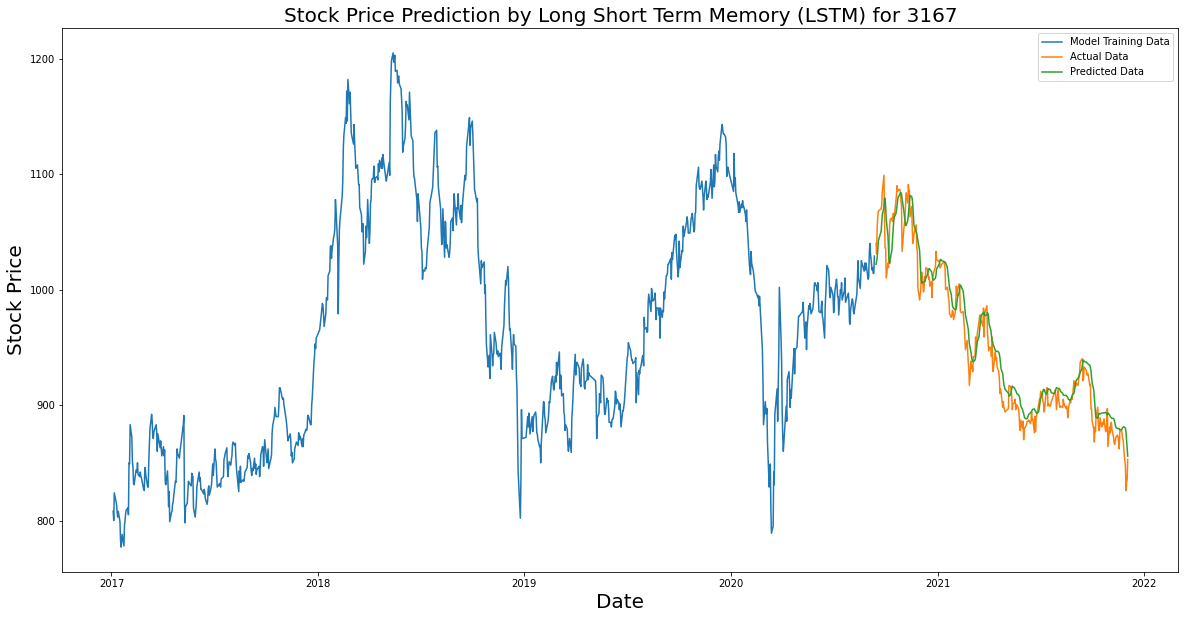

In [176]:
lstm_prediction_v(df)